In [33]:
import pylab as plt
import matplotlib as mpl
import numpy as np
from scipy import interpolate
import h5py as hdf
import h5_harm_script_parallel_F as hrms
import time
import os

print(os.getcwd())


# Create 'mems' Directory if don't exist:
if not os.path.exists('mems'):
    os.mkdir('mems')



import matplotlib.pyplot as plt
import math as Math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from scipy.interpolate import griddata
import matplotlib.cm as cm
import pandas as pd
from scipy.interpolate import griddata
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from matplotlib import ticker
from matplotlib.colors import LogNorm, ListedColormap

/home/joseph/Documents/LD1/exe


In [34]:
#nx,ny,nz,_dx1,_dx2,_dx3,a,gam,Rin,Rout,hslope,R0,x1,x2,x3,r,th,phi,gcov,gcon,gdet,alpha=hrms.csfn_gread()
#nx,ny,nz,_dx1,_dx2,_dx3,a,gam,Rin,Rout,hslope,R0,x1,x2,x3,r,th,phi,gdet=hrms.csfn_gread('dumps')
#nx,ny,nz,a,gam,Rin,Rout,R0,float_type=hrms.csfn_gread('dumps')
nx,ny,nz,r,h,ph,_dx1,_dx2,_dx3,a,gam,Rin,Rout,hslope,R0,x1,x2,x3,float_type=hrms.csfn_gread('dumps')

Maximum memory use, before hdf.File  211944 KB
Maximum memory use, after hdf.File  211944 KB
<HDF5 file "coords.h5" (mode r)>
dxpdx found in dumps/coords.h5


In [60]:
i = 40
t,nstep,rho,ug,vu,B,pg,divb,uu,ud,bu,bd,bsq,ktot,rhor,beta = hrms.csfn_dumpread("dump%03d"%i,gam,nx,ny,nz,float_type,"./dumps")

print("time in t_g = ",t)
#print("time = ",t*T_UNIT)

time in t_g =  2000.0073389202207


In [61]:
GNEWT = 6.6742867e-8
MSUN = 1.9892e33
YEAR = 365.25 * 24. * 3600.
KBOL = 1.3e-16
CL = 2.99792458e10
MP = 1.67262163783e-24
ME = 9.10956e-28
MN = 1.67492729e-24
MHE = 6.6465e-24	#2p+2e+binding energy
EE = 4.80320680e-10
SIGMATH = 6.65248e-25
SIGMASBOL = 5.67051e-5
MAV = (MP + MN + 2. * ME + MHE) / 5.	# avrage particle mass


M_BLH = 3. * MSUN


L_UNIT = GNEWT * M_BLH / (CL * CL)
RHO_SCALE = 1.5e-5

M_UNIT = RHO_SCALE * MSUN
T_UNIT = L_UNIT / CL

USCALE = 1.0;

RHO_UNIT = M_UNIT / (L_UNIT * L_UNIT * L_UNIT)
U_UNIT = RHO_UNIT * CL * CL * USCALE

E_UNIT = M_UNIT * CL*CL/ T_UNIT

P_UNIT = U_UNIT
SIM_UNIT = RHO_UNIT * CL * CL * CL / L_UNIT
B_UNIT = CL * np.sqrt(4 * np.pi * RHO_UNIT )


time_ = t * T_UNIT

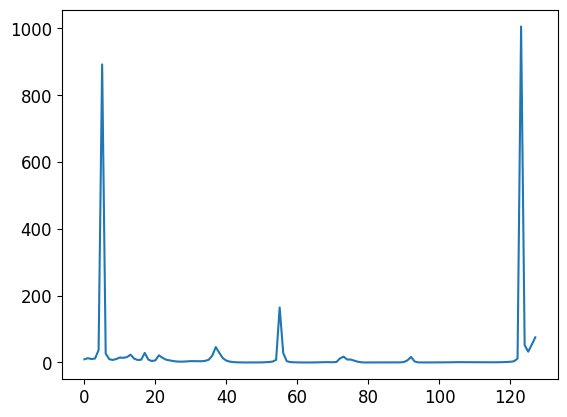

In [62]:
plt.plot(beta[:,ny//2,:][:200])

# Funcions to find values at grid

In [63]:
def nearest_idx(grid, val):
    grid = np.asarray(grid)
    return (np.abs(grid - val)).argmin()

def get_value(rq, tq, r_grid, th_grid, data):
    r_flat = r_grid[:, 0, 0]
    th_flat = th_grid[0, :, 0]

    ri = nearest_idx(r_flat, rq)
    ti = nearest_idx(th_flat, tq)

    return (data[ri, ti, 0], r_flat[ri], th_flat[ti])

In [64]:
def get_values_at_theta(tq, r_grid, th_grid, data):
    r_flat = r_grid[:, 0, 0]
    th_flat = th_grid[0, :, 0]
    
    ti = nearest_idx(th_flat, tq)

    values_at_theta = []
    r_values_at_theta = []


    for ri in range(len(r_flat)):
        value = data[ri, ti, 0]
        values_at_theta.append(value)
        r_values_at_theta.append(r_flat[ri])
    

    values_at_theta = np.array(values_at_theta)
    r_values_at_theta = np.array(r_values_at_theta)
    
    return values_at_theta, r_values_at_theta

In [65]:
def get_values_at_r(rq, r_grid, th_grid, data):
    # Flatten the grids for finding indices
    r_flat = r_grid[:, 0, 0]
    th_flat = th_grid[0, :, 0]

    ri = nearest_idx(r_flat, rq)

    values_at_r = []
    th_values_at_r = []

    for ti in range(len(th_flat)):
        value = data[ri, ti, 0]
        values_at_r.append(value)
        th_values_at_r.append(th_flat[ti])


    values_at_r = np.array(values_at_r)
    th_values_at_r = np.array(th_values_at_r)

    return values_at_r, th_values_at_r


In [66]:
pwd

'/home/joseph/Documents/LD1/exe'

# Calculating M_disk

In [67]:
import numpy as np
from scipy.integrate import trapz

N1=int(nx)
N2=int(ny)
r_max = 100000
gdet = hrms.gdet

rho_1 = rho * gdet
rho_1[r > r_max] = 0

#th_integral = trapz(rho_1[:,:,0], h[:,:,0], axis=1)

# Integration along r up to r_max
#r_integral = trapz(th_integral, r[:, 0,0], axis=0)
#M_Disk = r_integral * RHO_SCALE * 2 * np.pi
#M_Disk_ = "{:0.2e}".format(M_Disk)
#print('M_disk = ', M_Disk_ )



dr = _dx1
dh = _dx2
total_rho_sum = np.sum(rho_1* dr*dh  * RHO_SCALE * 2 * np.pi)

M_Disk_approx_ = "{:0.2e}".format(total_rho_sum)
print('M_disk approximated = ', M_Disk_approx_)


M_disk approximated =  2.29e-03


# Density Polar

In [68]:
# Calculating A_Phi

A_Phi = hrms.psicalc()
A_Phi_CL = np.linspace(A_Phi.min(), A_Phi.max(),10)





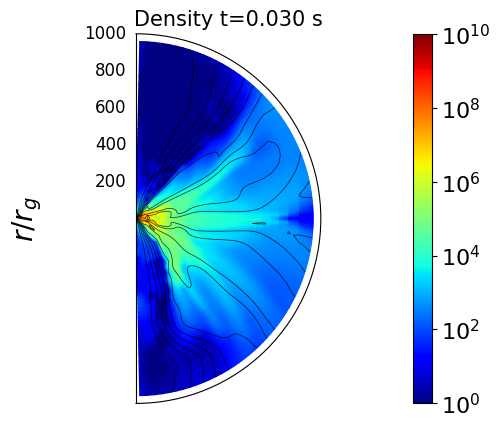

In [69]:
val = rho*RHO_UNIT
vmin=1e0  #val.min()
vmax=1e10  #val.max()

N1=int(nx)
N2=int(ny)

fig = plt.figure()
ax = plt.subplot(111, polar="True")
ax.set_rlabel_position(270)
ax.set_ylabel('$r/r_g$', fontsize=20, labelpad=0.01)



plt.grid(False)

c = plt.pcolormesh(h[:,:,0], r[:,:,0], val[:,:,0],  shading='gouraud', cmap = cm.jet, norm = LogNorm(vmin, vmax))
cont = plt.contour(h[:,:,0], r[:,:,0], A_Phi[:,:], colors='k', linewidths=0.5, linestyles='solid', levels=A_Phi_CL,alpha=0.8)


ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)


#ax.set_rmax(0)
ax.set_rmax(1000)
ax.set_thetamin(0)
ax.set_thetamax(180)
plt.title("Density t=%.3f s" % (time_), size=15)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.get_xaxis().set_ticks([])

cbar = fig.colorbar(c, pad=0.0001)
cbar.ax.tick_params(labelsize=16) 




# B

In [70]:
pwd

'/home/joseph/Documents/LD1/exe'

In [71]:
B_value = "{:0.2e}".format(get_value(60, 1.57, r, h, np.sqrt(bsq))[0]*B_UNIT)
print('B=',B_value,'G')

B= 1.01e+13 G


In [72]:
# Mean B Across Grid
suma2 = np.sum(dr*dh *2 * np.pi * L_UNIT**3 *gdet)
BSQ_aver = np.sum(bsq*dr*dh *2 * np.pi * L_UNIT**3 *gdet)
BSQ_aver = BSQ_aver/suma2
B_aver = "{:0.2e}".format(np.sqrt(BSQ_aver)*B_UNIT)
print('Average B = ',B_aver,'G')


Average B =  1.38e+12 G


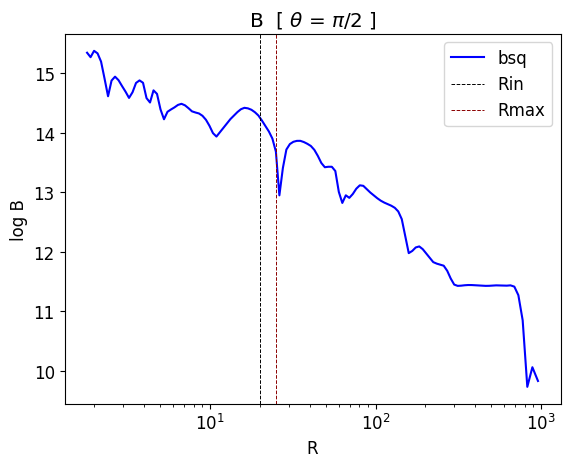

In [73]:
plt.rcParams['font.size'] = 12 

plt.plot(get_values_at_theta(1.5, r, h, bsq)[1] , np.log10(np.sqrt(get_values_at_theta(1.57, r, h, bsq)[0])*B_UNIT) ,color='blue',label='bsq')
#plt.xlim(0,100)
plt.xscale('log')
plt.axvline(x=20, color='k', linestyle='--',label='Rin',linewidth=0.7)
plt.axvline(x=25, color='darkred', linestyle='--',label='Rmax',linewidth=0.7)
plt.title(r'B  [ $\theta$ = $\pi/2$ ]')
plt.ylabel('log B')
plt.xlabel('R')
plt.legend()

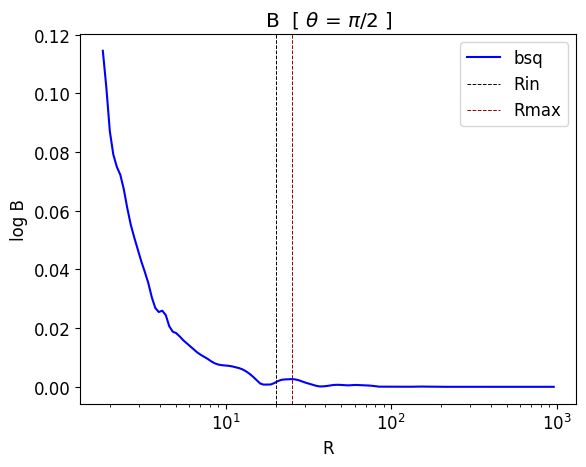

In [74]:
plt.rcParams['font.size'] = 12 

plt.plot(get_values_at_theta(1.5, r, h, bsq)[1] , np.sqrt(get_values_at_theta(1.57, r, h, ug)[0]) ,color='blue',label='bsq')
#plt.xlim(0,100)
plt.xscale('log')
plt.axvline(x=20, color='k', linestyle='--',label='Rin',linewidth=0.7)
plt.axvline(x=25, color='darkred', linestyle='--',label='Rmax',linewidth=0.7)
plt.title(r'B  [ $\theta$ = $\pi/2$ ]')
plt.ylabel('log B')
plt.xlabel('R')
plt.legend()

# B values colorplot

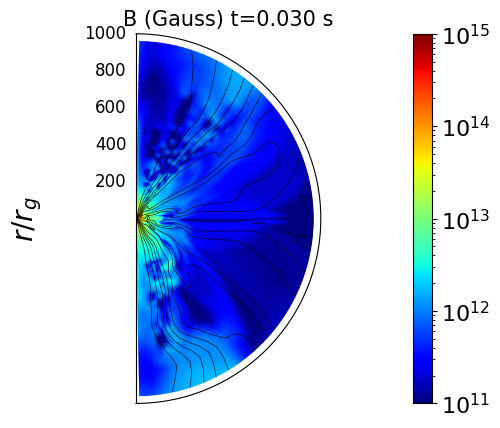

In [75]:
val = np.sqrt(bsq)*B_UNIT
vmin=1e11 #val.min()
vmax=1e15 #val.max()

N1=int(nx)
N2=int(ny)

fig = plt.figure()
ax = plt.subplot(111, polar="True")
ax.set_rlabel_position(270)
ax.set_ylabel('$r/r_g$', fontsize=20, labelpad=0.01)



plt.grid(False)

c = plt.pcolormesh(h[:,:,0], r[:,:,0], val[:,:,0],  shading='gouraud', cmap = cm.jet, norm = LogNorm(vmin, vmax))
cont = plt.contour(h[:,:,0], r[:,:,0], A_Phi[:,:], colors='k', linewidths=0.5, linestyles='solid', levels=A_Phi_CL,alpha=0.8)

#plt.plot(1.5,400,'k.')


ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)


#ax.set_rmax(0)
ax.set_rmax(1000)
ax.set_thetamin(0)
ax.set_thetamax(180)
plt.title("B (Gauss) t=%.3f s" % (time_), size=15)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.get_xaxis().set_ticks([])

cbar = fig.colorbar(c, pad=0.0001)
cbar.ax.tick_params(labelsize=16) 




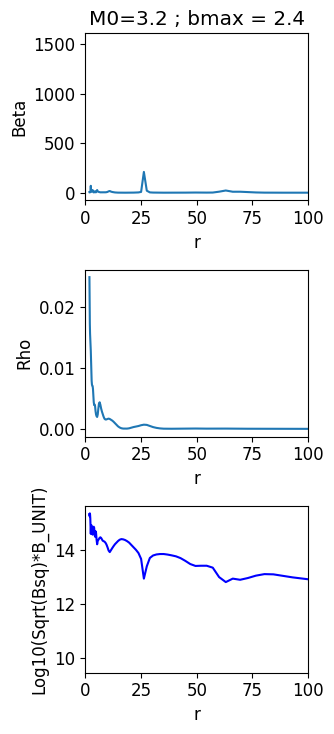

In [76]:
import matplotlib.pyplot as plt
import numpy as np


fig, axs = plt.subplots(3, 1, figsize=(3.5, 7.5))  

# Plot for beta
axs[0].set_title('M0=3.2 ; bmax = 2.4')
y_beta, x_beta = get_values_at_theta(1.57, r, h, beta)
axs[0].plot(x_beta[:200], y_beta[:200])
axs[0].set_xlim(0, 100)
#axs[0].set_ylim(0, 30)
axs[0].set_ylabel('Beta')

# Plot for rho
y_rho, x_rho = get_values_at_theta(1.57, r, h, rho)
axs[1].plot(x_rho, y_rho)
axs[1].set_xlim(0, 100)
axs[1].set_ylabel('Rho')

# Plot for bsq
y_bsq, x_bsq = get_values_at_theta(1.57, r, h, bsq)
y_bsq_transformed = np.log10(np.sqrt(get_values_at_theta(1.57, r, h, bsq)[0]) * B_UNIT)
axs[2].plot(x_bsq, y_bsq_transformed, color='blue')
axs[2].set_ylabel('Log10(Sqrt(Bsq)*B_UNIT)')
axs[2].set_xlim(0, 100)

# Common X label
for ax in axs:
    ax.set_xlabel('r')


plt.tight_layout()
#plt.show()

plt.savefig('beta_plots_M0_3.2_LD.png')

In [77]:
np.max(beta[:50,:,:])

3524.417556618974

# Mu - Max

In [78]:
hrms.Tcalcud()

In [79]:
mu_at_rg = get_values_at_r(200, r, h, hrms.mu)
print('mu_max= ', np.max(mu_at_rg))

mu_max=  449.4981145881843


# mu plots

(-100.0, 100.0)

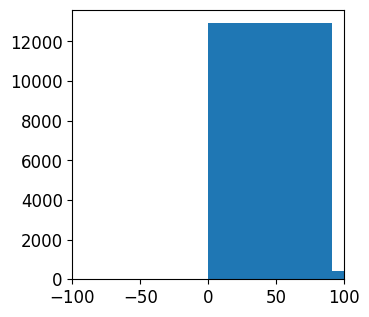

In [80]:
mu_filtered = hrms.mu[(hrms.mu < 1000) & (hrms.mu > 0)]
mu_filtered_reshaped = mu_filtered.reshape(-1)

plt.figure(figsize=(3.5,3.5)) 
plt.hist(mu_filtered_reshaped, bins=10)  
plt.xlim(-100,100)

In [81]:
hrms_lim = hrms.mu
hrms_lim [(hrms_lim  <= 0) | (hrms_lim  >= 100000)] = np.nan

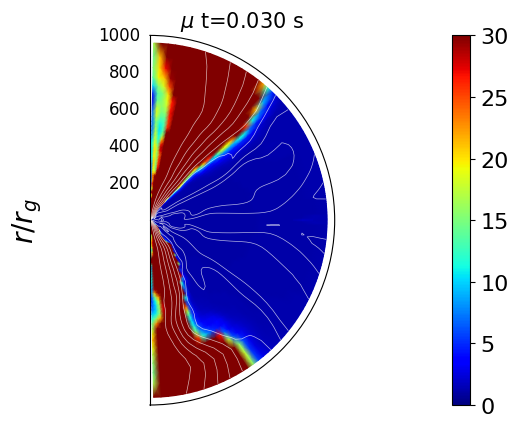

In [82]:
val = hrms_lim 
vmin=0 #val.min()
vmax=30  #val.max()

N1=int(nx)
N2=int(ny)

fig = plt.figure()
ax = plt.subplot(111, polar="True")
ax.set_rlabel_position(270)
ax.set_ylabel('$r/r_g$', fontsize=20, labelpad=10)



plt.grid(False)

c = plt.pcolormesh(h[:,:,0], r[:,:,0], val[:,:,0],  shading='gouraud', cmap = cm.jet, vmin=vmin, vmax=vmax)
cont = plt.contour(h[:,:,0], r[:,:,0], A_Phi[:,:], colors='w', linewidths=0.5, linestyles='solid', levels=A_Phi_CL,alpha=0.7)


ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)


#ax.set_rmax(0)
ax.set_rmax(1000)
ax.set_thetamin(0)
ax.set_thetamax(180)
plt.title("$\mu$ t=%.3f s" % (time_), size=15)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.get_xaxis().set_ticks([])

cbar = fig.colorbar(c)
cbar.ax.tick_params(labelsize=16) 




# BZ Luminosity

In [89]:
(1-np.sqrt(a**2))

0.4

In [93]:
hrms.Tcalcud()

T_1 = -1 * hrms.Tud[1,0]*gdet
Tud_integral = np.sum(T_1[0,:,0] * 2 * np.pi *dh)
L_BZ  = Tud_integral * E_UNIT
L_BZ_ = "{:0.2e}".format(L_BZ)
print('L_BZ = ', L_BZ_ )


L_BZ =  -3.52e+52


In [36]:
"{:0.2e}".format(np.sum( 2 * np.pi * -1.0 * ((bsq[1,:,0] * uu[1,:,0]*ud[1,:,0]) - (bu[1,:,0]*bd[1,:,0])) *gdet[1,:,0]*dh )* E_UNIT)

'-3.89e+53'

In [94]:
pwd

'/home/joseph/Documents/LD1/exe'

# carteisian with Fields

In [103]:
#B^i = (b^i . u^0 ) - (b^0 . u^i)  #from eq.17 in original HARM paper

#calculating 3-B from the 4-vectors in the dumps; and transformations

bu = hrms.bu
uu = hrms.uu

B1 = (bu[1,:,:,:]*uu[0,:,:,:])-(bu[0,:,:,:]*uu[1,:,:,:])
B2 = (bu[2,:,:,:]*uu[0,:,:,:])-(bu[0,:,:,:]*uu[2,:,:,:])
B3 = (bu[3,:,:,:]*uu[0,:,:,:])-(bu[0,:,:,:]*uu[3,:,:,:])

#transform to cartesian
B_x = (B1[:,:,:]*np.sin(h)*np.cos(ph) + B2[:,:,:]*np.cos(h)*np.cos(ph) - B3[:,:,:]*np.sin(ph))
B_y = (B1[:,:,:]*np.sin(h)*np.sin(ph) + B2[:,:,:]*np.cos(h)*np.sin(ph) + B3[:,:,:]*np.cos(ph))
B_z = (B1[:,:,:]*np.cos(h)            - B2[:,:,:]*np.sin(h))
    


xcoord = r[:,:,:]*np.sin(h[:,:,:])*np.cos(ph[:,:,:])
ycoord = r[:,:,:]*np.sin(h[:,:,:])*np.sin(ph[:,:,:])
zcoord = r[:,:,:]*np.cos(h[:,:,:])

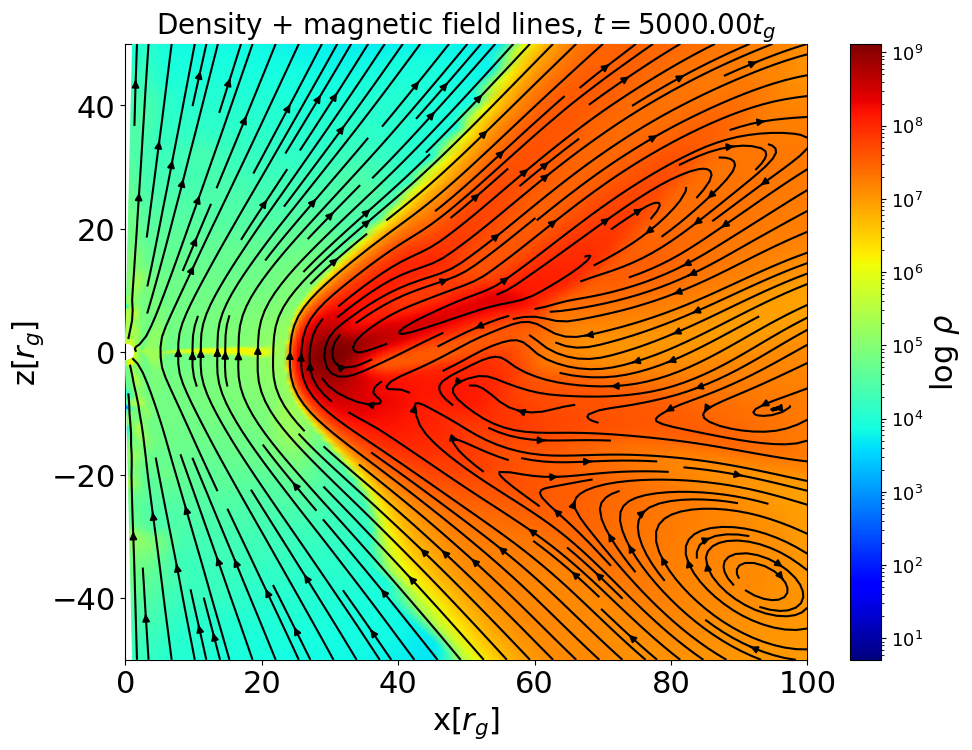

In [104]:


phi_j = 0
xcoord = r[:,:,phi_j]*np.sin(h[:,:,phi_j]); zcoord= r[:,:,phi_j]*np.cos(h[:,:,phi_j])

val = rho*RHO_UNIT
vmin=val.min()
vmax=val.max()

fig = plt.figure(1,figsize=(11,8))
plt.rcParams.update({'font.size': 22})
plt.clf()
#cs = plt.contourf(xcoord[:,:],zcoord[:,:],val[:,:,0],shading='gouraud', cmap = cm.jet, norm = LogNorm(vmin, vmax),zorder=4,extend = 'both')
cs = plt.pcolormesh(xcoord[:,:],zcoord[:,:],val[:,:,0],  shading='gouraud', cmap = cm.jet, norm = LogNorm(vmin, vmax),zorder=4)


#cs = plt.contourf(xcoord[:,:],zcoord[:,:],np.log10(rho[:,:,0]),levels=np.linspace(-3.5,1,150),cmap='jet',extend = 'both')

#cs = plt.contourf(xcoord[:,:],zcoord[:,:],np.log10(rho[:,:,0]),levels=np.linspace(-3.5,1,150),cmap='hot',extend = 'both')
#hot, viridis, turbo

box = 100.

# Create rectangular grid
x = np.linspace(0, box, 256)
z = np.linspace(-box/2, box/2, 256)

X, Z = np.meshgrid(x, z)

#Interpolate B1 B2 on the new grid
points = np.array( (xcoord.flatten(), zcoord.flatten()) ).T
U = interpolate.griddata(points, B_x[:,:,phi_j].flatten(), (X,Z), method='linear')
V = interpolate.griddata(points, B_z[:,:,phi_j].flatten(), (X,Z), method='linear')


plt.streamplot(X, Z, U, V, density = 2., color='k',zorder=5)




ax=plt.gca()
#ax.set_facecolor('w') #k
ax.set_facecolor('w') #k
#ax.add_patch(circle1)

ax.set_xlim(0,box)
ax.set_ylim(-box/2.0,box/2.0)


#--------------------------
#ax.set_xlim(0,200)
#ax.set_ylim(-100,100)
#ax.set_xlim(0,150)
#ax.set_ylim(-75,75)
ax.set_xlabel('x[$r_g$]')
ax.set_ylabel('z[$r_g$]')
#ax.set_title('Model1, Density, B-field lines, $\phi$ = 0, $t=%1.2e\,t_g$'%t)
ax.set_title('Density + magnetic field lines, $t=%0.2ft_g$'%t, fontsize = 20)
#cbar = plt.colorbar(cs, ticks=[-3, -2,-1, 0])
cbar = plt.colorbar(cs)
cbar.set_label(r'log $\rho$')
cbar.ax.tick_params(axis='both', which='both', labelsize=13)

plt.show()


# M_dot Plot

In [37]:
ener_out = pd.read_csv('ener.out', sep='\s+', header=None, skiprows=1)
m_dot = -1*ener_out[6]
time_ = ener_out[0]

#ener_out2 = pd.read_csv('ener_old.out', sep='\s+', header=None, skiprows=1)
#m_dot2 = -1*ener_out2[6]
#time_2= ener_out2[0]


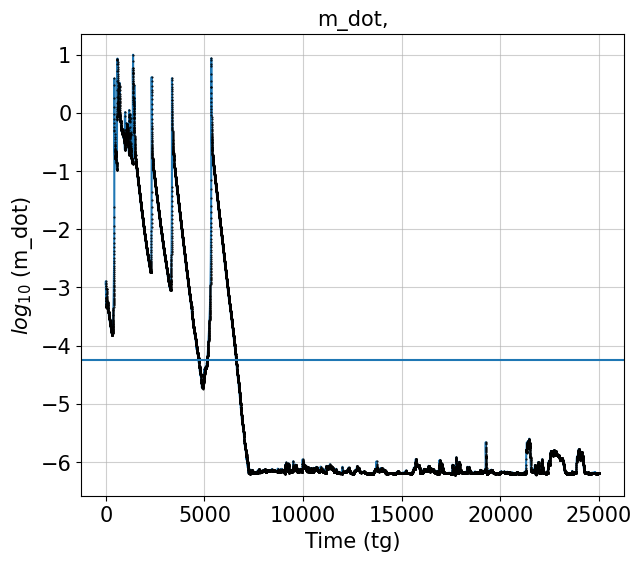

In [40]:
plt.figure(figsize=(7,6))
plt.plot(time_,np.log10(m_dot))
plt.plot(time_,np.log10(m_dot),'k.',markersize=1)
#plt.plot(time_2,np.log10(m_dot2),color='r')

plt.xlabel('Time (tg)',fontsize = 15)
plt.ylabel(r'$log_{10}$ (m_dot)',fontsize = 15)
plt.title('m_dot,',fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.grid(alpha=0.6)

plt.axhline(y=np.log10(5.6e-5))
#plt.xlim(0,2500)
#plt.yscale('log')